In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
def make_graphs(log_path, folderpath, suffix):
    """

    :param log_path:
    :param folderpath:
    :return:
    """

    if not os.path.exists(folderpath):
        os.makedirs(folderpath)

    log_smooth = pd.read_csv(log_path)
    log_smooth = log_smooth.groupby("epoch").mean().drop("batch", axis=1)
    y_ul = log_smooth.g_loss.std() * 6

    # Make graph for all losses
    fig, ax = plt.subplots()
    ax.plot(log_smooth.d_loss_real, label="d_loss_real")
    ax.plot(log_smooth.d_loss_fake, label="d_loss_fake")
    ax.plot(log_smooth.g_loss, label="g_loss")
    ax.legend(loc=2)
    ax.set_xlabel("Epoch")
    ax.set_xlim((0, len(log_smooth)))
    ax.set_ylim(0)
    ax.set_title("All Losses")
    fig.savefig(folderpath + "/all_losses" + suffix + ".png")

    fig, ax = plt.subplots()
    ax.plot(log_smooth.d_loss_real, label="d_loss_real")
    ax.legend(loc=2)
    ax.set_xlabel("Epoch")
    ax.set_xlim((0, len(log_smooth)))
    ax.set_ylim(0)
    ax.set_title("Discriminator Real Sample Losses")
    fig.savefig(folderpath + "/real_losses" + suffix + ".png")

    fig, ax = plt.subplots()
    ax.plot(log_smooth.d_loss_fake, label="d_loss_fake")
    ax.legend(loc=2)
    ax.set_xlabel("Epoch")
    ax.set_xlim((0, len(log_smooth)))
    ax.set_ylim(0)
    ax.set_title("Discriminator Fake Sample Losses")
    fig.savefig(folderpath + "/fake_losses" + suffix + ".png")

    fig, ax = plt.subplots()
    ax.plot(log_smooth.g_loss, label="g_loss")
    ax.legend(loc=2)
    ax.set_xlabel("Epoch")
    ax.set_xlim((0, len(log_smooth)))
    ax.set_ylim(0)
    ax.set_title("GAN (generator) Losses")
    fig.savefig(folderpath + "/gan_losses" + suffix + ".png")

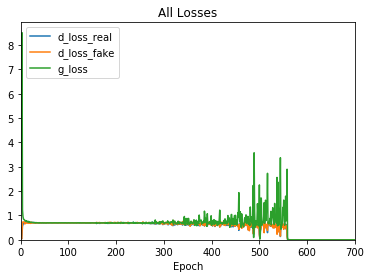

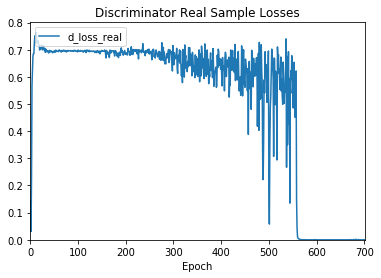

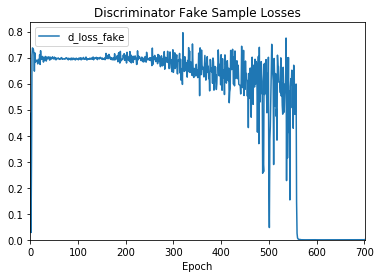

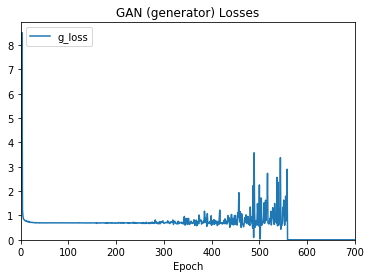

In [13]:
logPath = "../../2020-01-31 02-20/loss_history.csv"
folderPath = "figure"
suffix = "_1"

make_graphs(logPath, folderPath, suffix)

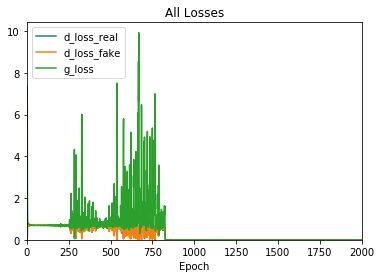

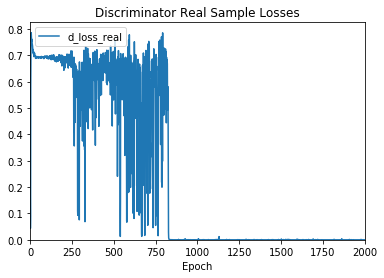

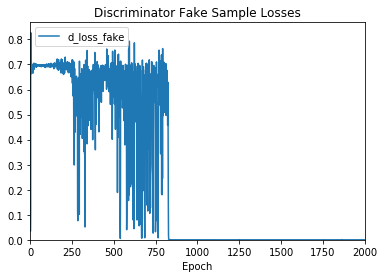

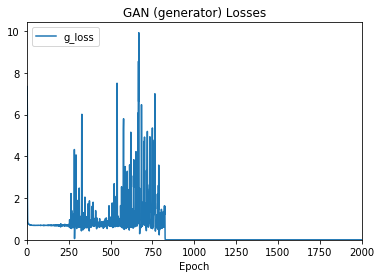

In [14]:
logPath = "../../2020-02-11 22-13/loss_history.csv"
folderPath = "figure"
suffix = "_2"

make_graphs(logPath, folderPath, suffix)

In [22]:
def make_graphs2(log_path, folderpath, suffix):
    """

    :param log_path:
    :param folderpath:
    :return:
    """

    if not os.path.exists(folderpath):
        os.makedirs(folderpath)

    log_smooth = pd.read_csv(log_path)
    log_smooth = log_smooth.groupby("epoch").mean().drop("batch", axis=1)
    y_ul = log_smooth.g_pitch_loss.std() * 6

    # Make graph for all losses
    fig, ax = plt.subplots()
    ax.plot(log_smooth.d_dur_loss_real, label="d_loss_real")
    ax.plot(log_smooth.d_dur_loss_fake, label="d_loss_fake")
    ax.plot(log_smooth.d_pitch_loss_real, label="g_loss")
    ax.plot(log_smooth.d_pitch_loss_fake, label="d_loss_real")
    ax.plot(log_smooth.g_dur_loss, label="d_loss_fake")
    ax.plot(log_smooth.g_pitch_loss, label="g_loss")
    ax.legend(loc=2)
    ax.set_xlabel("Epoch")
    ax.set_xlim((0, len(log_smooth)))
    ax.set_ylim(0)
    ax.set_title("All Losses")
    fig.savefig(folderpath + "/all_losses" + suffix + ".png")

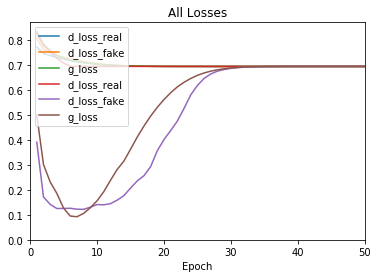

In [23]:
logPath = "../../2020-02-11 22-00/loss_history.csv"
folderPath = "figure"
suffix = "_3"

make_graphs2(logPath, folderPath, suffix)

In [18]:
logPath = "../../2020-02-11 22-00/loss_history.csv"

log_smooth = pd.read_csv(logPath)
log_smooth = log_smooth.groupby("epoch").mean().drop("batch", axis=1)

In [19]:
log_smooth.head()

,d_dur_loss_real,d_dur_loss_fake,d_pitch_loss_real,d_pitch_loss_fake,g_dur_loss,g_pitch_loss
epoch,,,,,,
1.0,0.770452,0.806777,0.832386,0.825731,0.390336,0.499250
2.0,0.745306,0.760691,0.782125,0.776751,0.171266,0.301439
3.0,0.736305,0.748463,0.755762,0.752413,0.141650,0.231614
4.0,0.729404,0.738641,0.736483,0.725961,0.125034,0.185415
5.0,0.722793,0.730294,0.725941,0.707074,0.125587,0.126596
